<a href="https://colab.research.google.com/github/felipeapgodoi/MetodosNumericos2020_3/blob/master/C%C3%B3pia_de_C%C3%B3pia_de_ComparaMetodosDeSolucao_FelipeGodoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import numpy.linalg as npla
import time
import matplotlib.pyplot as plt

In [85]:
!git clone https://github.com/felipeapgodoi/MetodosNumericos2020_3 #clonar do Github
%cd MetodosNumericos2020_3

Cloning into 'MetodosNumericos2020_3'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 91 (delta 48), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3


In [86]:
from GaussPivot import gauss
from GaussSeidel import gauss_seidel
from Jacobi import jacobi
from Sorteste import SOR


/content/MetodosNumericos2020_3/GaussSeidel.py:40: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/MetodosNumericos2020_3/GaussSeidel.py:35: RuntimeWarning: invalid value encountered in double_scalars
  sum1 += A[i,j]*x_new[j]
/content/MetodosNumericos2020_3/Sorteste.py:41: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/MetodosNumericos2020_3/Sorteste.py:43: RuntimeWarning: invalid value encountered in double_scalars
  x_new[i] = omega*x_new[i]+(1-omega)*x[i]
/content/MetodosNumericos2020_3/GaussSeidel.py:38: RuntimeWarning: overflow encountered in double_scalars
  sum2 += A[i,j]*x[j]
/content/MetodosNumericos2020_3/Sorteste.py:43: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = omega*x_new[i]+(1-omega)*x[i]
/content/MetodosNumericos2020_3/GaussSeidel.py:35: RuntimeWarning: overflow encountered in double_scalars
  sum1 += A[i,j]*x_new[j]
/content/MetodosNumeric

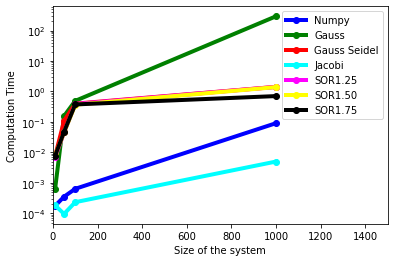

In [87]:
# size of the matrix to be calculated
SIZE = [10,50,100,1000]

# create list
cpu_time_numpy = []
cpu_time_eliminacaodegauss = []
cpu_time_gaussseidel = []
cpu_time_jacobi = []
cpu_time_SOR125 = []
cpu_time_SOR150 = []
cpu_time_SOR175 = []

# loop over the size
for size in SIZE :
  # create the system
  A = np.random.rand(size,size)
  f = np.random.rand(size)
  # nummpy
  t0 = time.clock()
  w=npla.solve(A,f)
  cpu_time_numpy.append(time.clock()-t0)

  # mycodeeliminacaodegauss
  t0 = time.clock()
  x= gauss(A,f)
  cpu_time_eliminacaodegauss.append(time.clock()-t0)

  # mycodegaussseidel
  t0 = time.clock()
  x0= np.random.rand(size)
  y = gauss_seidel(A,f,x0)
  cpu_time_gaussseidel.append(time.clock()-t0)

  # mycodejacobi
  t0 = time.clock()
  z = jacobi(A,f,x)
  cpu_time_jacobi.append(time.clock()-t0)

  # mycodesor1
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.25
  x = SOR(A,f,x0,omega)
  cpu_time_SOR125.append(time.clock()-t0)

  # mycodesor2
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.5
  x = SOR(A,f,x0,omega)
  cpu_time_SOR150.append(time.clock()-t0)

  # mycodesor3
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.75
  x = SOR(A,f,x0,omega)
  cpu_time_SOR175.append(time.clock()-t0)

# plot the results
plt.semilogy(SIZE,cpu_time_numpy,'o-',linewidth=4, color='blue',label='Numpy')
plt.semilogy(SIZE,cpu_time_eliminacaodegauss,'o-',linewidth=4, color='green',label='Gauss')
plt.semilogy(SIZE,cpu_time_gaussseidel,'o-',linewidth=4, color='red',label='Gauss Seidel')
plt.semilogy(SIZE,cpu_time_jacobi,'o-',linewidth=4, color='cyan',label='Jacobi')
plt.semilogy(SIZE,cpu_time_SOR125,'o-',linewidth=4, color='magenta',label='SOR1.25')
plt.semilogy(SIZE,cpu_time_SOR150,'o-',linewidth=4, color='yellow',label='SOR1.50')
plt.semilogy(SIZE,cpu_time_SOR175,'o-',linewidth=4, color='black',label='SOR1.75')

plt.xlabel('Size of the system'  )
plt.ylabel('Computation Time')
plt.xlim([0,1500])
plt.legend(loc=1, prop={'size':10})
plt.show()

In [88]:
print (cpu_time_numpy)
print(cpu_time_eliminacaodegauss)
print(cpu_time_gaussseidel)
print(cpu_time_jacobi)
print(cpu_time_SOR125)
print(cpu_time_SOR150)
print(cpu_time_SOR175)

[0.0001770000000078653, 0.0003530000000182554, 0.0006399999999757711, 0.09126200000002882]
[0.0006539999999404245, 0.15673400000002857, 0.49221799999997984, 294.1426200000001]
[0.00758799999994153, 0.1094630000000052, 0.3986369999998942, 1.419548000000077]
[0.00018199999999524152, 9.599999998499698e-05, 0.00023299999998016574, 0.005022999999937383]
[0.0068740000000389045, 0.04542100000003302, 0.3882899999999836, 1.411346999999978]
[0.00799399999993966, 0.045216999999979635, 0.3668430000000171, 1.3922909999998865]
[0.007835999999997512, 0.04764599999998609, 0.3757620000000088, 0.7063430000000608]
